In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
faces = np.arange(1,7)

def roll_20(trials):
    success = 0

    for i in np.arange(trials):
        outcomes = np.random.choice(faces,20)
        if np.count_nonzero(outcomes==6) >= 1:
            success = success + 1
    
    return success / trials

In [4]:
roll_20(1000)

0.974

In [5]:
estimates = Table().with_column('Estimates',[roll_20(1000) for ind in np.arange(100)])

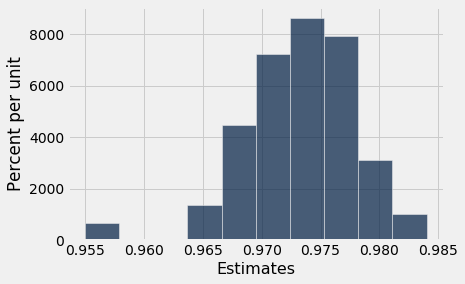

In [6]:
estimates.hist()

In [7]:
# BACK TO SLIDES (Planes)

In [8]:
N = 300
serial_no = Table().with_column('Serial number',np.arange(N))
serial_no

Serial number
0
1
2
3
4
5
6
7
8
9


In [9]:
serial_no.sample(30).column(0).max()

280

In [10]:
estimated_max = [serial_no.sample(30).column(0).max() for repitition in np.arange(1000)]

In [11]:
estimated_max

[299,
 289,
 268,
 296,
 290,
 294,
 285,
 287,
 299,
 295,
 297,
 297,
 289,
 294,
 292,
 299,
 292,
 288,
 299,
 299,
 292,
 293,
 299,
 299,
 263,
 281,
 292,
 298,
 259,
 291,
 271,
 288,
 295,
 294,
 288,
 293,
 294,
 294,
 296,
 290,
 293,
 290,
 293,
 297,
 283,
 295,
 292,
 295,
 293,
 289,
 253,
 275,
 299,
 295,
 273,
 290,
 282,
 298,
 299,
 287,
 297,
 295,
 293,
 296,
 290,
 294,
 299,
 275,
 291,
 294,
 293,
 283,
 292,
 295,
 295,
 298,
 289,
 293,
 297,
 291,
 297,
 292,
 295,
 282,
 285,
 298,
 285,
 295,
 296,
 299,
 297,
 293,
 298,
 287,
 281,
 263,
 289,
 297,
 295,
 279,
 275,
 291,
 290,
 298,
 298,
 298,
 285,
 294,
 293,
 286,
 295,
 296,
 298,
 296,
 289,
 297,
 287,
 298,
 293,
 297,
 299,
 284,
 299,
 299,
 279,
 290,
 283,
 291,
 285,
 299,
 291,
 298,
 278,
 292,
 297,
 296,
 291,
 298,
 293,
 289,
 287,
 296,
 290,
 293,
 293,
 276,
 292,
 286,
 271,
 298,
 295,
 293,
 263,
 293,
 291,
 296,
 283,
 293,
 292,
 295,
 285,
 299,
 299,
 281,
 292,
 285,
 292

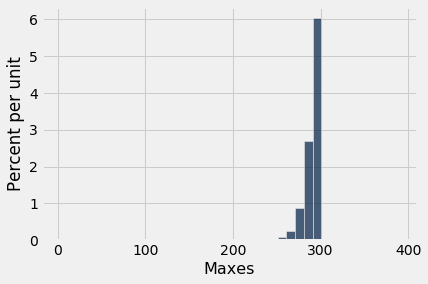

In [12]:
Table().with_column('Maxes',estimated_max).hist(0, bins=np.arange(1,400,10))

In [13]:
# back to slides
maxes = make_array()
doubles = make_array()

repititions = 1000
sample_size = 30
for i in np.arange(repititions):
    sampled_N = serial_no.sample(sample_size).column(0)
    maxes = np.append(maxes, np.max(sampled_N))
    doubles = np.append(doubles,np.average(sampled_N)*2)

estimates = Table().with_columns('Maxes',maxes,'Doubles',doubles)
estimates

Maxes,Doubles
290,305.067
296,304.8
295,288.2
275,276.533
296,327.8
280,285.267
290,291.6
287,311
285,324.733
297,316.067


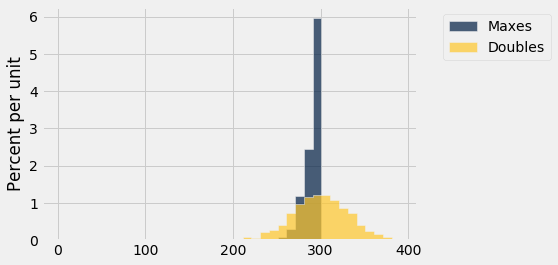

In [14]:
estimates.hist(bins=np.arange(1,400,10))

In [22]:
# turn off the projector, set N = 1200, create ppulation, turn projector back on
# # of Z's in all of shakespeare's plays = 1020
N = 1020
population = Table().with_column('Serial number', np.arange(N))
observation = population.sample(sample_size).column(0)
observation

array([ 884,   45,  723,  476,  517,   84,  591,  299,  619,   14,  831,
        564,  694,  241,  100,  211,  430,  634,  325,  581,  310,  977,
        311,  466, 1006,  222,  576,  300,  740,  119])

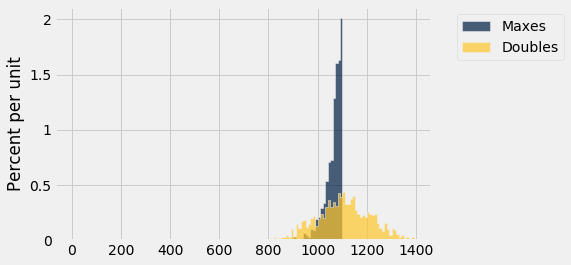

In [24]:
# if we didn't know what N was, how would we figure it out?
maxes = make_array()
doubles = make_array()

repititions = 1000
sample_size = 30
for i in np.arange(repititions):
    sampled_N = population.sample(sample_size).column(0)
    maxes = np.append(maxes, np.max(sampled_N))
    doubles = np.append(doubles,np.average(sampled_N)*2)

estimates = Table().with_columns('Maxes',maxes,'Doubles',doubles)
estimates.hist(bins=np.arange(1,N+300,10))

In [ ]:
# The shapes of these estimators are different in sort of interesting ways
# To understand what to take away from them, we want to introduce the idea of
# bias and variance

# back to slides

# A Clever Estimator

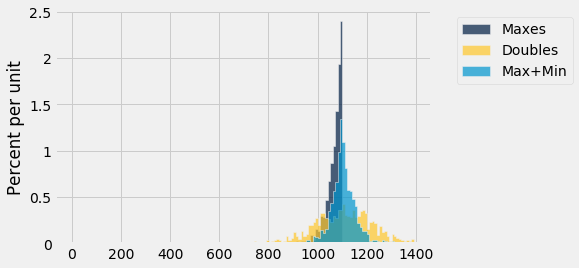

In [27]:
# if we didn't know what N was, how would we figure it out?
maxes = make_array()
mins = make_array()
doubles = make_array()

repititions = 1000
sample_size = 30
for i in np.arange(repititions):
    sampled_N = population.sample(sample_size).column(0)
    maxes = np.append(maxes, np.max(sampled_N))
    mins = np.append(mins, np.min(sampled_N))
    doubles = np.append(doubles,np.average(sampled_N)*2)

estimates = Table().with_columns('Maxes',maxes,'Doubles',doubles,'Max+Min',maxes+mins)
estimates.hist(bins=np.arange(1,N+300,10))

In [29]:
# Bias and Variability
# On average, how far away are my estimates from my average extimate?

# don't worry too much about the exact details, but this is a numeric measurement of variability

np.abs(estimates.column(0) - estimates.column(0).mean()).mean()

24.045079999999988

In [30]:
np.abs(estimates.column(1) - estimates.column(1).mean()).mean()

95.39392666666667

In [31]:
np.abs(estimates.column(2) - estimates.column(2).mean()).mean()

36.353444

In [ ]:
# challenge for you -- can you find a better estimator?

# Jury Panels

In [54]:
# What is the probability of getting 8/100 black people in the jury?
# hard to compute directly, but easy to simulate

# start w/ the distributions of the eligible panel and the actual panel
# draw panels at random from this population
# estimate the probability from these samples to see if the actual panel was likely

# first -- poll, who thinks it's a likely panel or not?

swain = Table().with_columns(
    'Ethnicity', make_array('Black','Other'),
    'Eligible', make_array(0.26,0.74),
    'Panel', make_array(0.08,0.92)
)

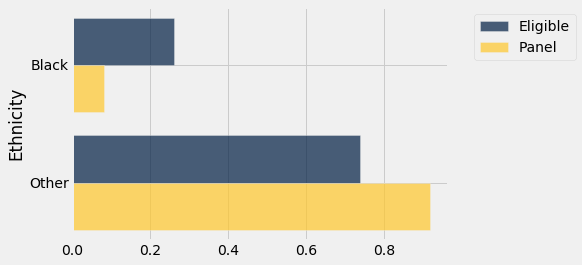

In [33]:
swain.barh(0)

In [37]:
# with the planes, we were able to measure how 'off' we were by just subtracting
# "estimation of 10 off" is better than "estimate of 20 off"

# for distributions, it's more complicated -- need to use Total Variation Distance
# take every column and subtract:
tvd = np.sum(np.abs(swain.column(1) - swain.column(2))) / 2
tvd

# the cloesr two distributions are to each other, the lower tvd will be

0.18000000000000002

In [38]:
def total_variation_distance(dist1,dist2):
    return sum(abs(dist1-dist2)) / 2

total_variation_distance(swain.column(1), swain.column(2))

0.18000000000000002

In [40]:
ethnicities = swain.select(0)
ethnicities

Ethnicity
Black
Other


In [44]:
ethnicities.sample(10) # this gives a asmple that's half black, half other
# but we need a sample that has the actual percentages!

Ethnicity
Other
Other
Other
Other
Other
Black
Other
Other
Other
Other


In [45]:
pop_dist = swain.column('Eligible')
pop_dist

array([0.26, 0.74])

In [46]:
ethnicities.sample(10,weights=pop_dist)

Ethnicity
Other
Other
Other
Other
Black
Other
Other
Other
Other
Black


In [52]:
sample_panel = ethnicities.sample(100,weights=pop_dist).group('Ethnicity')
counts = sample_panel.column('count')
proportions = counts/100
proportions

array([0.24, 0.76])

In [55]:
swain.with_column('Random', proportions)

Ethnicity,Eligible,Panel,Random
Black,0.26,0.08,0.24
Other,0.74,0.92,0.76


In [87]:
def random_jury_panel():
    sample_panel = ethnicities.sample(100,weights=pop_dist).group('Ethnicity')
    counts = sample_panel.column('count')
    proportions = counts / 100
    with_random = swain.with_column('Random', proportions)
    return with_random

In [106]:
random_jury_panel()

Ethnicity,Eligible,Panel,Random
Black,0.26,0.08,0.31
Other,0.74,0.92,0.69


In [107]:
repetitions = 1000
rtvds = make_array()

for i in np.arange(repetitions):
    new_sample = random_jury_panel()
    rtvds = np.append(rtvds,total_variation_distance(new_sample.column(1),new_sample.column(3)))

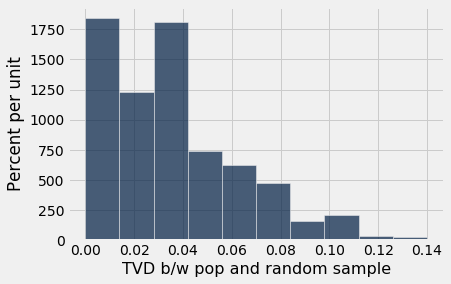

In [110]:
Table().with_column('TVD b/w pop and random sample',rtvds).hist(bins=np.arange(0,0.2,0.01))

In [111]:
# what was the original TVD? 
tvd

0.18000000000000002